In [1]:
#Import the required packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#Load the bike CSV file to bike dataframe
bikedf=pd.read_csv('https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv')
bikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Check whether the daaframe has any invalid values. We can conclude this that the data looks good.
bikedf.info()
#out of 16 columns 11 columns are integer, 4 columns are float and one Date type(Object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [4]:
#Find the shape of the dataframe
bikedf.shape
#Data frame has 730 rows and 16 columns

(730, 16)

In [5]:
# Find the mean and median values
bikedf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Check if there is any null values in the specific column. Now all good to proceed
bikedf.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#Validate that if there is any duplicate rows are there in data frame
bike_duplicate = bikedf.copy()
bike_duplicate.drop_duplicates(subset=None, inplace=True)
bike_duplicate.shape
#Conclusion is that there is no duplicate rows exist.

(730, 16)

In [8]:
for col in bikedf.iloc[:,1:16]:
    print(bikedf.iloc[:,1:16][col].value_counts(ascending=False), '\n\n\n')
#Identified the distinct values from the data frame

29-01-2018    1
25-10-2018    1
26-04-2018    1
20-04-2019    1
12-06-2019    1
             ..
22-01-2019    1
17-12-2019    1
31-12-2018    1
21-07-2019    1
20-05-2018    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



1    365
0    365
Name: yr, dtype: int64 



12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145

In [9]:
unwanted_columns=['instant','dteday','casual','registered']
for column in unwanted_columns:
    #print(column)
    bikedf.drop(column,axis=1, inplace=True)
bikedf.info()
#Attributes which are not deriving factors are removed from dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.5 KB


In [10]:
bikedf.shape
#Identify the new size of the array

(730, 12)

In [11]:
#Converted the Numeric value to categorical value
bikedf['season']= bikedf['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bikedf['weekday'] = bikedf['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
bikedf['yr'] = bikedf['yr'].map({0: '2018', 1: '2019'})
bikedf['workingday'] = bikedf['workingday'].map({0: 'No', 1: 'Yes'})

bikedf['weathersit'] = bikedf.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})
bikedf['mnth'] = bikedf.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [12]:
bikedf.head()
#Validate if the colums are converded into categorical value

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,saturday,No,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sunday,No,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,monday,Yes,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tuesday,Yes,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wednesday,Yes,clear,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#bikedf.mnth.value_counts()
bikedf.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

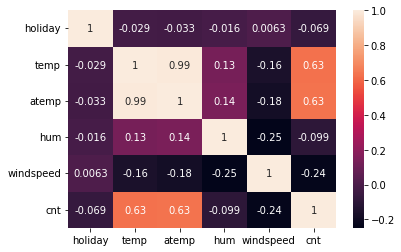

In [14]:
sns.heatmap(bikedf.corr(), annot = True)
plt.show()
#Check the correlation for the numerical value

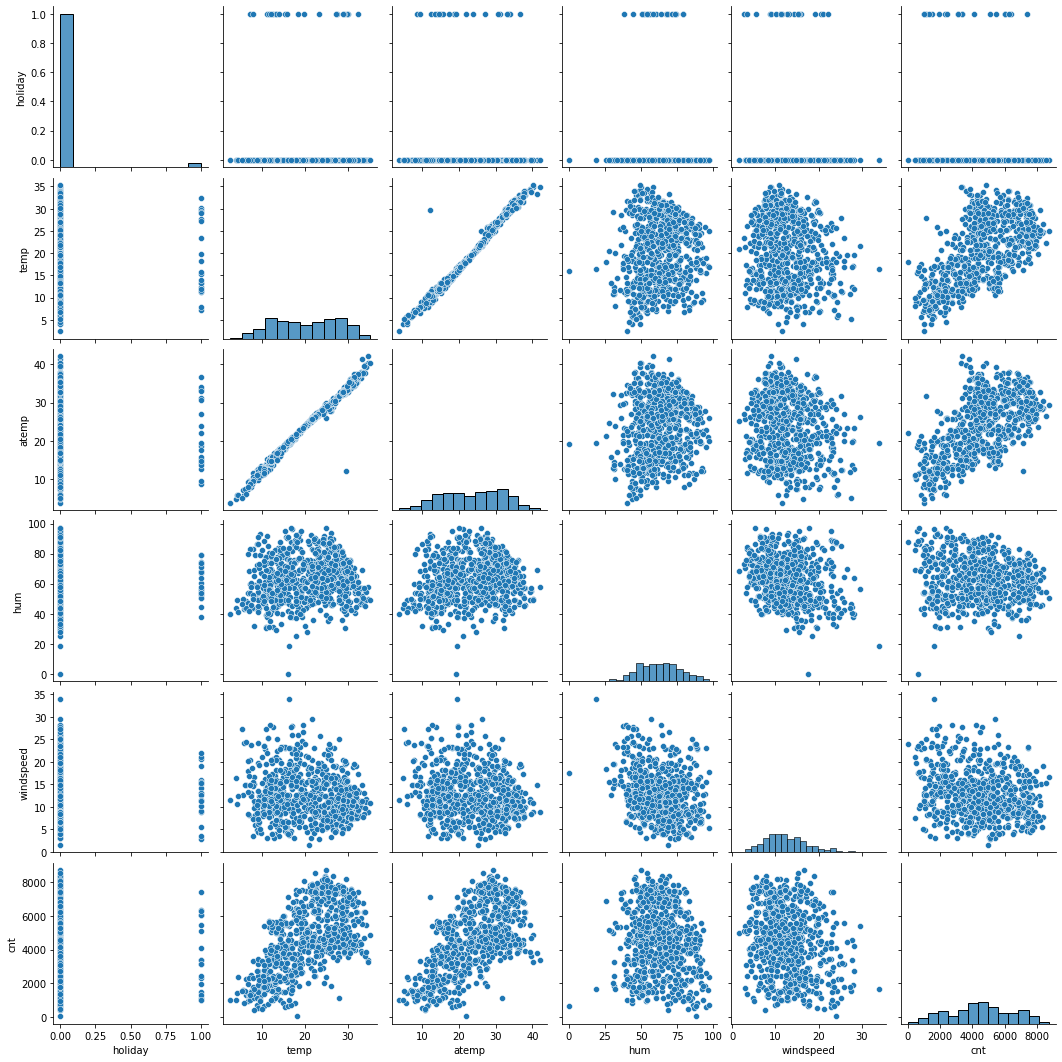

In [15]:
sns.pairplot(bikedf)
plt.show()

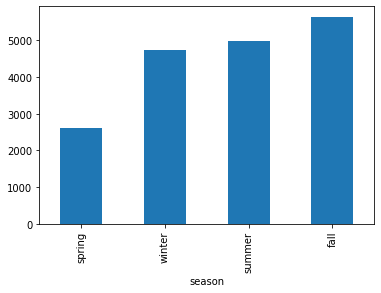

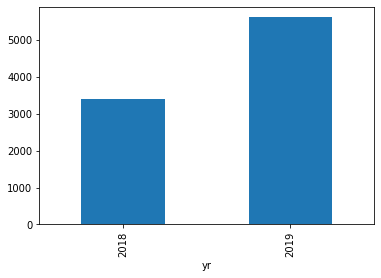

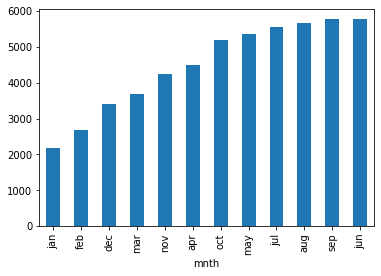

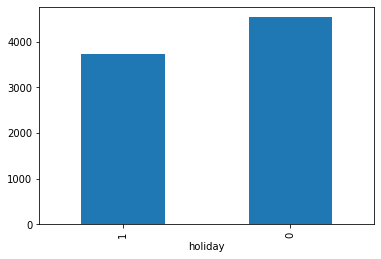

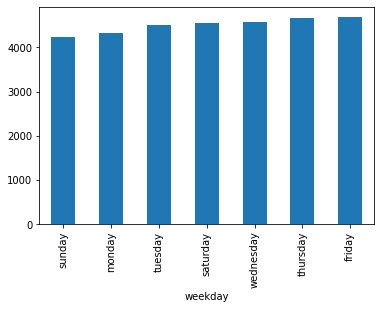

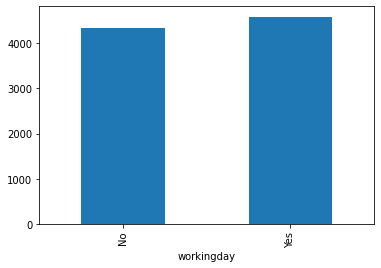

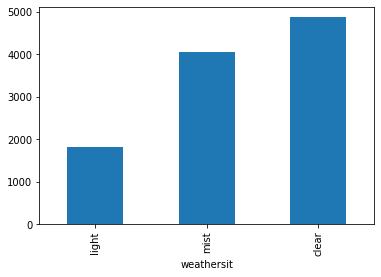

In [16]:
bike_categorical_variable=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
for var_name in bike_categorical_variable:
    season_dist = bikedf.groupby(by=var_name).cnt.mean().sort_values()
    season_dist.plot(kind='bar')
    plt.show();

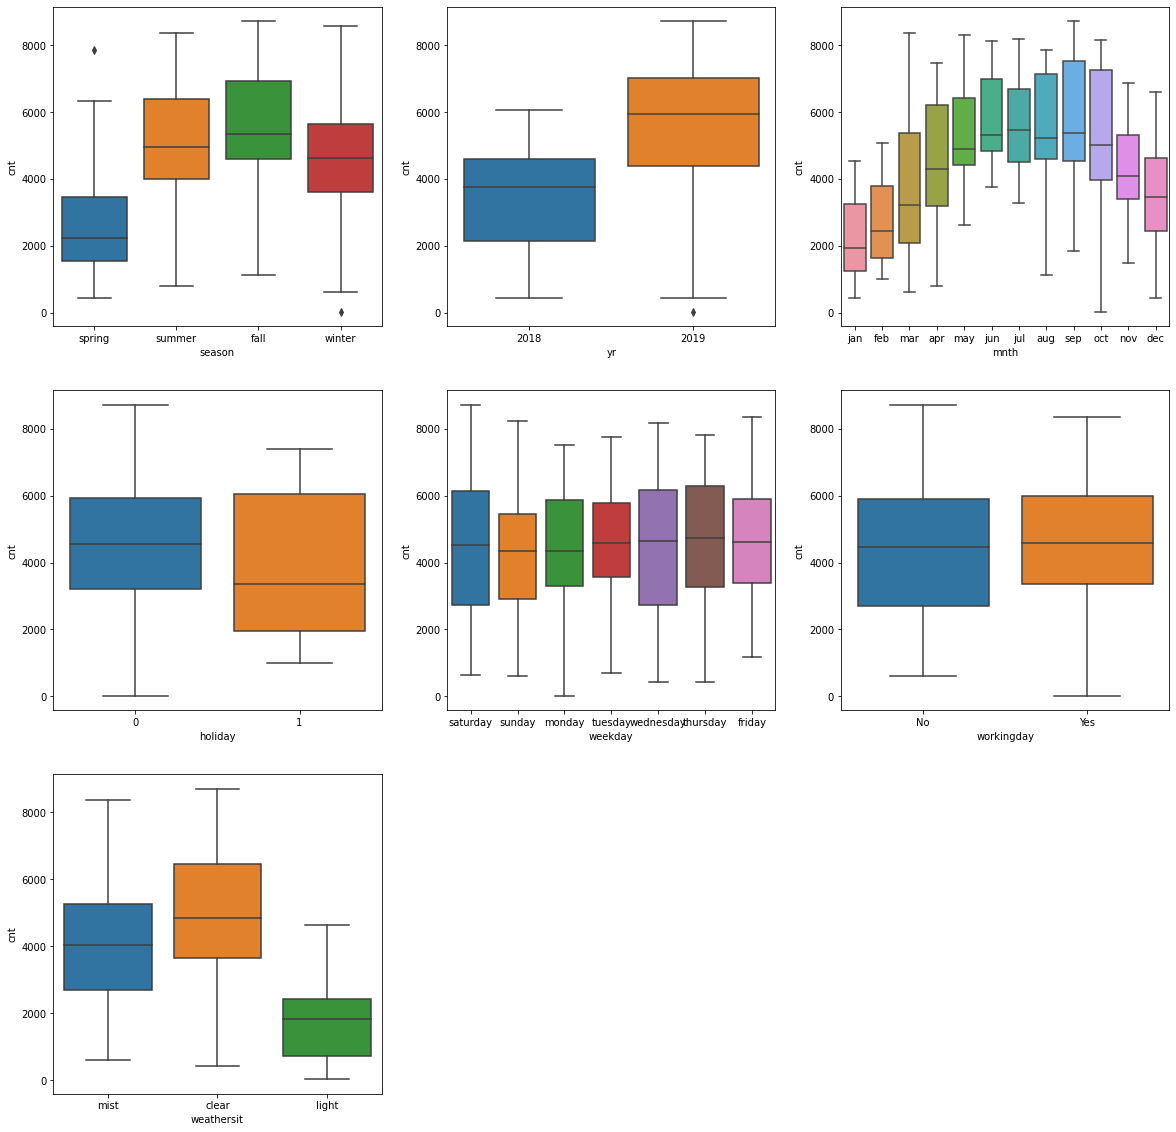

In [17]:
plt.figure(figsize=(20,20))
num_size=331
for var_name in bike_categorical_variable:
    plt.subplot(num_size)
    sns.boxplot(x=var_name, y='cnt',data=bikedf)
    num_size+=1
plt.show();
#From the first plot we can see the pattern that there is a high demand in Fall and Summer Season
#From the second plot we can see that 2019 has high demand
#From the third plot we can see that Aug,Sep,Oct has a high demand
#From the forth plot we can't see any pattern. Seems both holiday and non-holiday has a same level of demand
#From the 5th Plot we can see that Sat/Wed/THurs day has a demand compare to other days
#From the 6th Plot we can't see any pattern
.

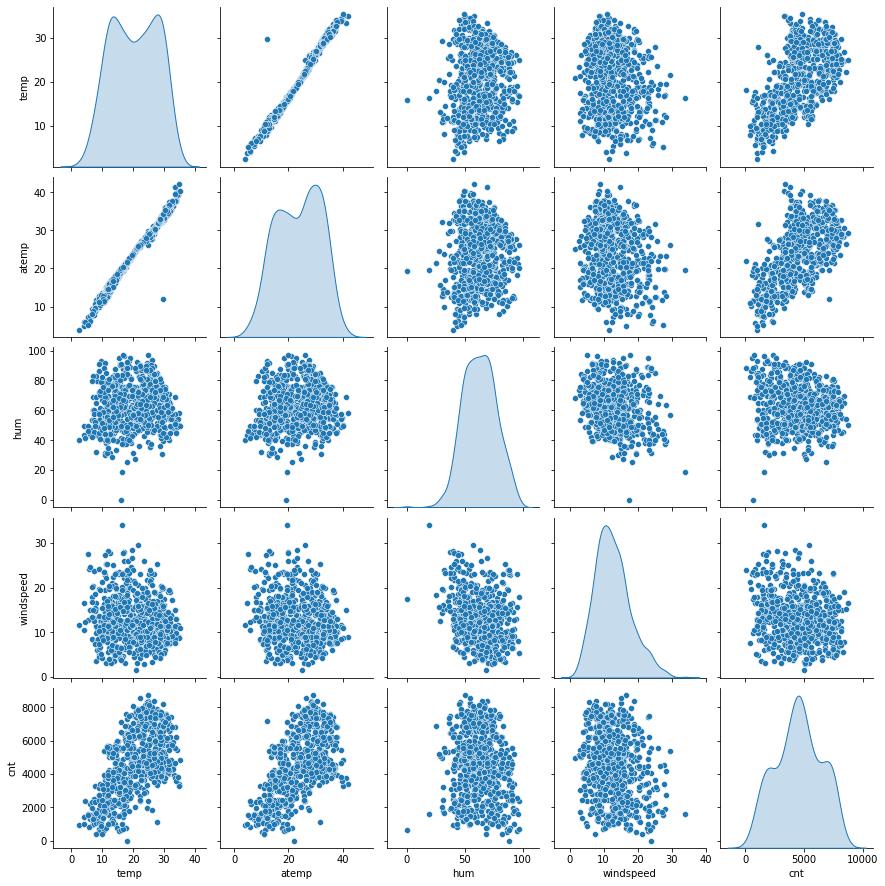

In [18]:
bike_numerical=bikedf[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(bike_numerical, diag_kind='kde')
plt.show()
#Linear relationship on temp,atemp and cnt

In [19]:
bike_newdf = pd.get_dummies(bikedf, drop_first=True)
# We will visualise the changes after the dummy creation.
bike_newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   holiday            730 non-null    int64  
 1   temp               730 non-null    float64
 2   atemp              730 non-null    float64
 3   hum                730 non-null    float64
 4   windspeed          730 non-null    float64
 5   cnt                730 non-null    int64  
 6   season_spring      730 non-null    uint8  
 7   season_summer      730 non-null    uint8  
 8   season_winter      730 non-null    uint8  
 9   yr_2019            730 non-null    uint8  
 10  mnth_aug           730 non-null    uint8  
 11  mnth_dec           730 non-null    uint8  
 12  mnth_feb           730 non-null    uint8  
 13  mnth_jan           730 non-null    uint8  
 14  mnth_jul           730 non-null    uint8  
 15  mnth_jun           730 non-null    uint8  
 16  mnth_mar           730 non

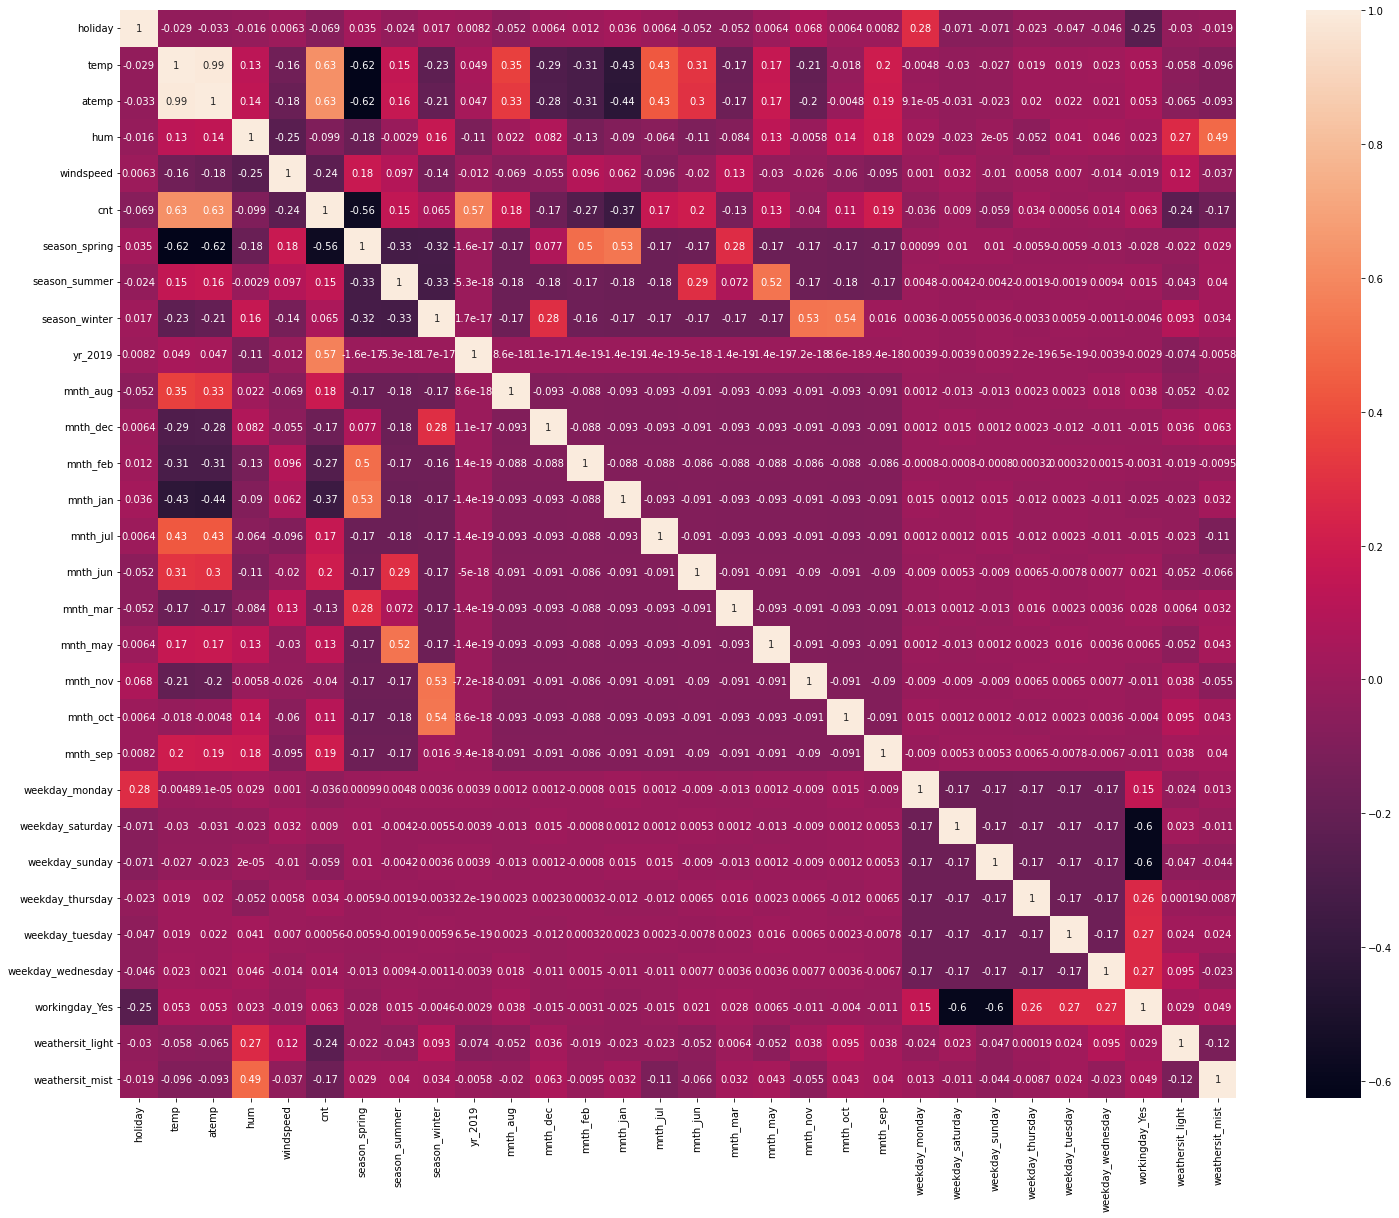

In [20]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_newdf.corr(), annot = True)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
#np.random.seed(0)
bike_train, bike_test = train_test_split(bike_newdf, train_size = 0.70, test_size = 0.30, random_state = 100)

In [22]:
print(bike_train.shape)
print(bike_test.shape)
print(bike_newdf.shape)

(510, 30)
(219, 30)
(730, 30)


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
numerical_col=['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_train[numerical_col] = scaler.fit_transform(bike_train[numerical_col])
bike_train.head(10)

,holiday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_Yes,weathersit_light,weathersit_mist
653,0,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,...,0,0,0,0,0,1,0,1,0,0
576,0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
426,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
728,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
482,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
580,0,0.914852,0.882350,0.632030,0.462538,0.782559,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
500,0,0.719639,0.678508,0.719193,0.172431,0.851588,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
479,0,0.520271,0.513565,0.440962,0.164434,0.710308,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
472,0,0.503656,0.496135,0.586518,0.270032,0.499885,0,1,0,1,...,0,0,0,0,0,0,1,1,0,1


In [25]:
bike_train.describe()

,holiday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_Yes,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.676471,0.029412,0.343137
std,0.157763,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.468282,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
y_train = bike_train.pop('cnt')
X_train = bike_train

In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)        
rfe = rfe.fit(X_train, y_train)

In [28]:
rfe_dataframe = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_dataframe.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,holiday,True,1
26,workingday_Yes,True,1
22,weekday_sunday,True,1
21,weekday_saturday,True,1
19,mnth_sep,True,1
27,weathersit_light,True,1
13,mnth_jul,True,1
8,yr_2019,True,1
28,weathersit_mist,True,1
6,season_summer,True,1


In [29]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_jul', 'mnth_sep', 'weekday_saturday',
       'weekday_sunday', 'workingday_Yes', 'weathersit_light',
       'weathersit_mist'],
      dtype='object')

In [30]:
X_train_rfe = X_train[rfe_col]

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,workingday_Yes,50.69
10,weekday_saturday,12.20
11,weekday_sunday,11.79
4,season_spring,5.02
1,temp,3.62
6,season_winter,3.49
0,holiday,2.91
5,season_summer,2.61
2,hum,1.91
14,weathersit_mist,1.57


In [32]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [33]:
lr1.params

const               0.198900
holiday            -0.018955
temp                0.527819
hum                -0.159467
windspeed          -0.180601
season_spring      -0.055434
season_summer       0.052613
season_winter       0.100294
yr_2019             0.229738
mnth_jul           -0.054881
mnth_sep            0.081773
weekday_saturday    0.093682
weekday_sunday      0.040479
workingday_Yes      0.083695
weathersit_light   -0.246332
weathersit_mist    -0.057847
dtype: float64

In [34]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.13e-191
Time:                        15:18:38   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1989      0.028  

In [35]:
#Removed the high P value column
X_train_new = X_train_rfe.drop(["season_spring"], axis = 1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(vif)
print(lr2.summary())

            Features    VIF
11    workingday_Yes  30.83
9   weekday_saturday   7.64
10    weekday_sunday   7.53
0            holiday   2.10
2                hum   1.89
1               temp   1.60
13   weathersit_mist   1.56
7           mnth_jul   1.43
4      season_summer   1.33
5      season_winter   1.29
12  weathersit_light   1.24
8           mnth_sep   1.19
3          windspeed   1.18
6            yr_2019   1.03
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          2.77e-191
Time:                        15:18:39   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:              

In [36]:
#Removed the high P value column
X_train_new = X_train_new.drop(["mnth_jul"], axis = 1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(vif)
print(lr3.summary())

            Features    VIF
10    workingday_Yes  30.83
8   weekday_saturday   7.64
9     weekday_sunday   7.53
0            holiday   2.10
2                hum   1.87
12   weathersit_mist   1.56
1               temp   1.27
5      season_winter   1.25
11  weathersit_light   1.24
4      season_summer   1.19
3          windspeed   1.18
7           mnth_sep   1.12
6            yr_2019   1.03
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.2
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          6.34e-191
Time:                        15:18:39   Log-Likelihood:                 510.49
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     497   BIC:           

In [37]:
#Removed the high P value column
X_train_new = X_train_new.drop(["workingday_Yes"], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(vif)
print(lr4.summary())

            Features    VIF
2                hum  14.64
1               temp   8.01
3          windspeed   3.61
11   weathersit_mist   2.13
6            yr_2019   2.01
5      season_winter   1.66
4      season_summer   1.58
8   weekday_saturday   1.22
9     weekday_sunday   1.22
7           mnth_sep   1.21
10  weathersit_light   1.17
0            holiday   1.05
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          4.55e-191
Time:                        15:18:39   Log-Likelihood:                 510.83
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     497   BIC:                            -940.6
Df M

In [38]:
#Removed the high P value column
X_train_new = X_train_new.drop(["weekday_saturday"], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train, X_train_lm5).fit()
print(vif)
print(lr5.summary())

            Features    VIF
2                hum  14.54
1               temp   8.01
3          windspeed   3.56
10   weathersit_mist   2.13
6            yr_2019   2.01
5      season_winter   1.66
4      season_summer   1.58
7           mnth_sep   1.21
8     weekday_sunday   1.19
9   weathersit_light   1.17
0            holiday   1.05
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     242.9
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          4.02e-192
Time:                        15:18:39   Log-Likelihood:                 510.47
No. Observations:                 510   AIC:                            -996.9
Df Residuals:                     498   BIC:                            -946.1
Df Model:                       

In [39]:
#Removed the high P value column
X_train_new = X_train_new.drop(["hum"], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()
print(vif)
print(lr6.summary())

           Features   VIF
1              temp  3.72
2         windspeed  3.08
5           yr_2019  2.00
3     season_summer  1.56
9   weathersit_mist  1.48
4     season_winter  1.39
6          mnth_sep  1.21
7    weekday_sunday  1.16
8  weathersit_light  1.08
0           holiday  1.04
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.0
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          2.88e-189
Time:                        15:18:39   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.1
Df Model:                          10                                         
Cov

In [40]:
y_train_pred = lr6.predict(X_train_lm6)

c:\users\hi\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

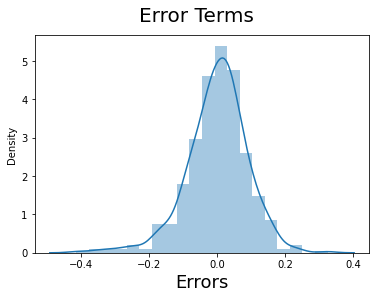

In [41]:
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 
#Plot is normally distriputed

In [42]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [43]:
bike_test.describe()
#Identify the mean,Median value

,holiday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_Yes,weathersit_light,weathersit_mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,...,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.698630,0.027397,0.319635
std,0.188034,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,...,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.459904,0.163612,0.467403
min,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.info()
# Cnt is a predicting factor , hence we are removing it

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   holiday            219 non-null    int64  
 1   temp               219 non-null    float64
 2   atemp              219 non-null    float64
 3   hum                219 non-null    float64
 4   windspeed          219 non-null    float64
 5   season_spring      219 non-null    uint8  
 6   season_summer      219 non-null    uint8  
 7   season_winter      219 non-null    uint8  
 8   yr_2019            219 non-null    uint8  
 9   mnth_aug           219 non-null    uint8  
 10  mnth_dec           219 non-null    uint8  
 11  mnth_feb           219 non-null    uint8  
 12  mnth_jan           219 non-null    uint8  
 13  mnth_jul           219 non-null    uint8  
 14  mnth_jun           219 non-null    uint8  
 15  mnth_mar           219 non-null    uint8  
 16  mnth_may           219 no

In [45]:
col1=X_train_new.columns
X_test=X_test[col1]
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             219 non-null    float64
 1   holiday           219 non-null    int64  
 2   temp              219 non-null    float64
 3   windspeed         219 non-null    float64
 4   season_summer     219 non-null    uint8  
 5   season_winter     219 non-null    uint8  
 6   yr_2019           219 non-null    uint8  
 7   mnth_sep          219 non-null    uint8  
 8   weekday_sunday    219 non-null    uint8  
 9   weathersit_light  219 non-null    uint8  
 10  weathersit_mist   219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


Text(0, 0.5, 'y_pred')

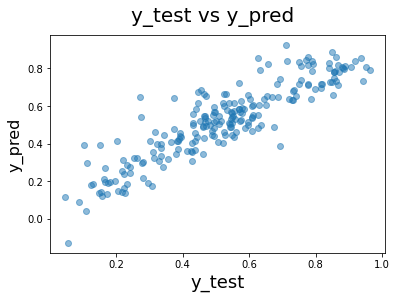

In [46]:
y_pred = lr6.predict(X_test_lm6)
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
# R**2 value 0.795

0.7958272128950747

In [50]:
n = X_test.shape[0]
p = X_test.shape[1]
r2=0.795827
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2
#Adjusted r**2 - 0.786

0.7860109903846153

In [55]:
from math import sqrt
from sklearn.metrics import mean_squared_error
MSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
MSE
#Identified the mean squared error 0.0985

0.0985

In [57]:
from sklearn.metrics import mean_absolute_error
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE
#Mean absolute error 0.0755

0.0755

In [ ]:
#Train R^2 :0.795 - Train Adjusted R^2 :0.786 --- - Test R^2 :0.837 - Test Adjusted R^2 :0.834